## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'approx1e5-spaceNet-wavelet-gray' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\spaceNet\\wavelet\\approx1e5\\gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)

print("Check that this <= 1e5 if approx1e5:", group_data_map[sorted(group_data_map)[-1]].size)
group_total_samples 

Check that this <= 1e5 if approx1e5: 100000


{2: 27208,
 3: 108832,
 4: 333298,
 5: 1149538,
 6: 4251250,
 7: 17005000,
 8: 68020000,
 9: 272080000}

In [6]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:817: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:822: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


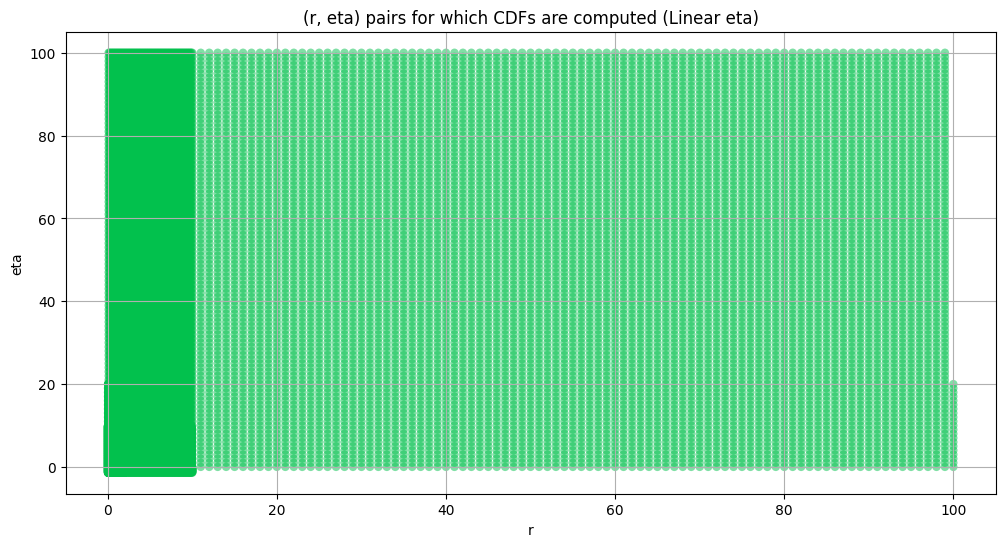

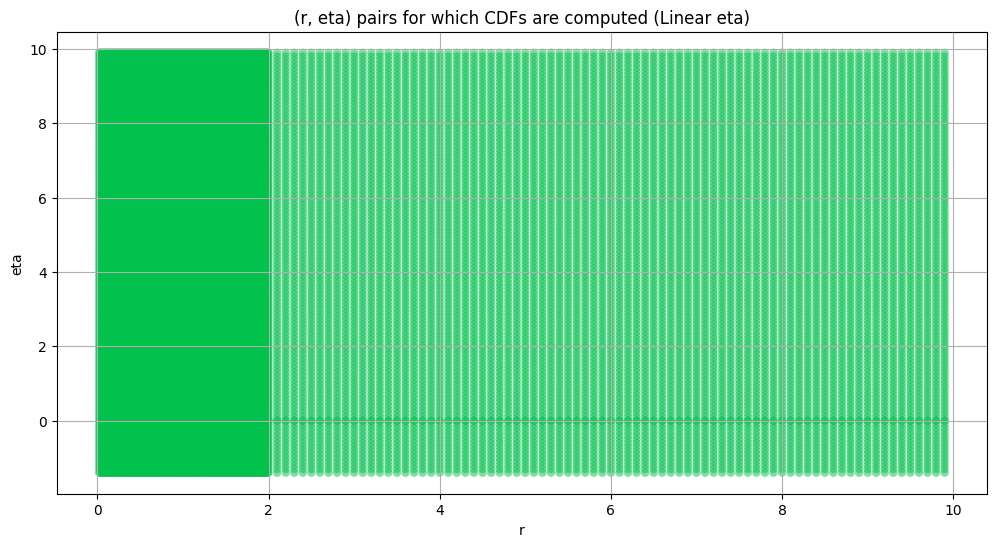

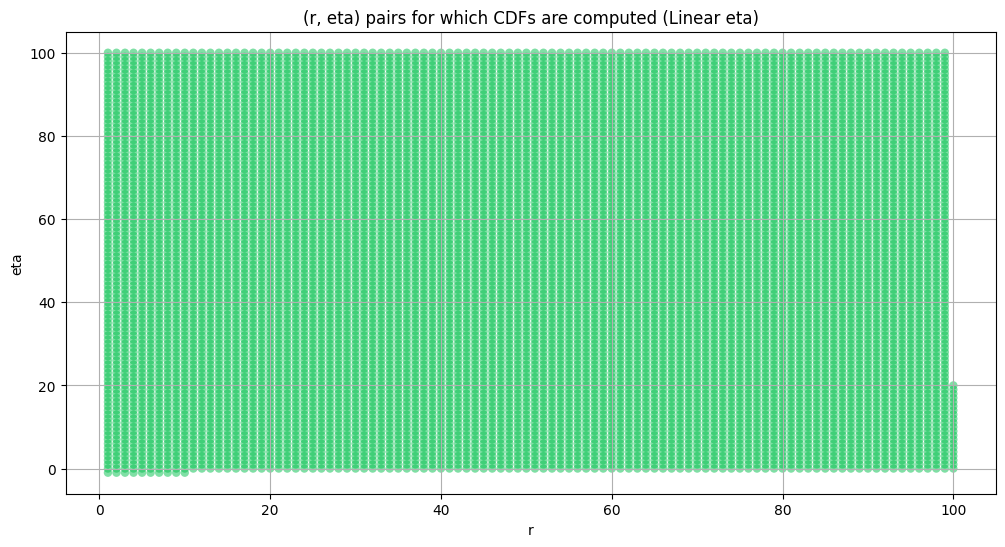

c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,r,eta,variance,kurtosis
count,51883.000000,51883.000000,5.188300e+04,5.064200e+04
mean,11.990701,21.476312,inf,inf
std,22.639851,28.237512,inf,NaN
min,0.020000,-1.400000,0.000000e+00,4.787254e-04
25%,1.000000,3.000000,9.882555e-01,1.513901e-02
50%,1.970000,7.600000,1.482803e+00,1.950077e-01
75%,8.100000,32.000000,5.742021e+00,6.565170e-01
max,100.000000,100.000000,1.797693e+308,inf


In [7]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [8]:
n_bootstrap = int(1e4)
bootstrap_size = int(1e5)
ci = 0.99

In [9]:
''' Only need to run commented code once'''    
# for group in  GROUPS:
#     print(f'{GROUP.capitalize()} {group}')
#     obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
#                                                                              n_bootstrap=n_bootstrap, 
#                                                                              bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
#                                                                              metric= np.var, 
#                                                                              ci=ci)
#     obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
#                                                                                  n_bootstrap=n_bootstrap, 
#                                                                                  bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
#                                                                                  metric= stats.kurtosis, ci=ci)  
#     master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
#     master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
#     master_df.loc[group, 'total_samples'] = group_total_samples[group]

# master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
var_kurt_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples
layer,,,,,,,
2,18678.610095,17966.073886,19422.080909,4.316037,3.317390,5.573077,27208.0
3,5005.063650,4855.965346,5158.679696,11.797886,9.044237,15.566047,108832.0
4,1581.178010,1537.627181,1624.394654,9.157593,7.794711,11.019769,333298.0
5,447.847215,435.501122,461.318748,10.530340,7.889795,15.658804,1149538.0
6,107.281974,104.317266,110.387641,10.589933,8.557735,13.717805,4251250.0
7,23.563500,22.718360,24.468354,18.387578,12.287278,29.259174,17005000.0
8,5.003841,4.767093,5.268274,36.420392,18.094400,73.733458,68020000.0
9,0.925920,0.862232,1.016825,103.432572,23.139160,238.260365,272080000.0


In [11]:
# ''' Only need to run commented code once'''
# sorted_params = sorted(all_cdfs)
# group_cdf_df_dict = dict()

# for i, group in enumerate(GROUPS):
#     print(f"####\n{GROUP.capitalize()} ", group)
#     sample = group_data_map[group]
#     group_cdf_df = all_cdfs_df.copy()
#     ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
#     master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
#     print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
#     master_df.loc[group, 'kstest_stat_initial'] = min_stat
#     cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
#     master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

#     group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
    
#     group_cdf_df_dict[group] = group_cdf_df
#     cols = ['pass_var', 'pass_kstest', 'pass_kurt']

#     fig = combo_test_plot(group_cdf_df_dict[group], cols, 
#                           plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
#                           target_var = master_df.loc[group, 'obs_var'],
#                           best_param = initial_param)
    
#     fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

#     # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
#     # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

#     # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
#     # plt.close(fig_var)
#     # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
#     # plt.close(fig_kurt)

# master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
# pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"), index_col=GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05
layer,,,,,,,,,,,
2,18678.610095,17966.073886,19422.080909,4.316037,3.317390,5.573077,27208.0,0.21,0.0,0.020902,0.008227
3,5005.063650,4855.965346,5158.679696,11.797886,9.044237,15.566047,108832.0,0.09,-1.3,0.132440,0.004115
4,1581.178010,1537.627181,1624.394654,9.157593,7.794711,11.019769,333298.0,0.18,-0.9,0.077070,0.002352
5,447.847215,435.501122,461.318748,10.530340,7.889795,15.658804,1149538.0,0.17,-1.1,0.042157,0.001267
6,107.281974,104.317266,110.387641,10.589933,8.557735,13.717805,4251250.0,0.22,-1.0,0.023660,0.000659
7,23.563500,22.718360,24.468354,18.387578,12.287278,29.259174,17005000.0,0.28,-1.0,0.018575,0.000329
8,5.003841,4.767093,5.268274,36.420392,18.094400,73.733458,68020000.0,0.43,-1.0,0.012470,0.000165
9,0.925920,0.862232,1.016825,103.432572,23.139160,238.260365,272080000.0,1.23,-1.0,0.016603,0.000082


In [12]:
''' Only need to run commented code once'''
best_params_eta0 = []
for i, group in enumerate(GROUPS):
    if master_df.loc[group, 'initial_eta'] != 0:
        sample = group_data_map[group]
        group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
        cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
        ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
        best_params_eta0.append(best_param_eta0[0])
        master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
    else:
        master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
        best_params_eta0.append(master_df.loc[group, 'initial_r'])
master_df['best_r_eta0'] = best_params_eta0
master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"), index_col=GROUP)
master_df

100%|██████████| 369/369 [00:07<00:00, 50.95it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:08<00:00, 45.51it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:06<00:00, 55.17it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:07<00:00, 52.39it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:06<00:00, 57.16it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:08<00:00, 44.32it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:06<00:00, 54.03it/s]

Finding Minimum after computing 369 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0
layer,,,,,,,,,,,,,
2,18678.610095,17966.073886,19422.080909,4.316037,3.317390,5.573077,27208.0,0.21,0.0,0.020902,0.008227,0.020902,0.21
3,5005.063650,4855.965346,5158.679696,11.797886,9.044237,15.566047,108832.0,0.09,-1.3,0.132440,0.004115,0.132444,0.29
4,1581.178010,1537.627181,1624.394654,9.157593,7.794711,11.019769,333298.0,0.18,-0.9,0.077070,0.002352,0.086826,0.30
5,447.847215,435.501122,461.318748,10.530340,7.889795,15.658804,1149538.0,0.17,-1.1,0.042157,0.001267,0.073939,0.34
6,107.281974,104.317266,110.387641,10.589933,8.557735,13.717805,4251250.0,0.22,-1.0,0.023660,0.000659,0.058179,0.41
7,23.563500,22.718360,24.468354,18.387578,12.287278,29.259174,17005000.0,0.28,-1.0,0.018575,0.000329,0.064562,0.60
8,5.003841,4.767093,5.268274,36.420392,18.094400,73.733458,68020000.0,0.43,-1.0,0.012470,0.000165,0.065002,1.57
9,0.925920,0.862232,1.016825,103.432572,23.139160,238.260365,272080000.0,1.23,-1.0,0.016603,0.000082,0.121877,6.10


In [13]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Layer 2


100%|██████████| 420/420 [00:01<00:00, 216.40it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 2 best parameters: ((0.205, -0.1), 0.01950552569645858)


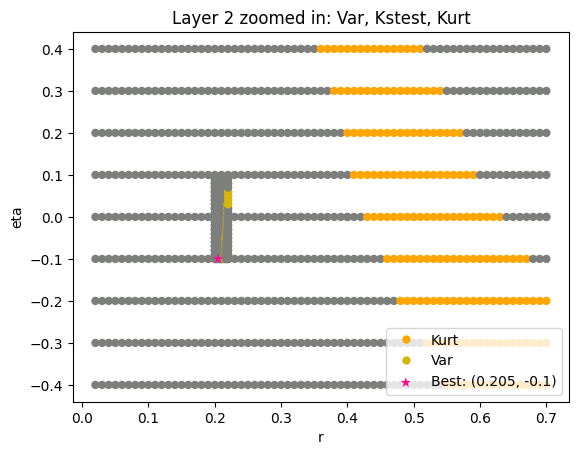

Layer 3


100%|██████████| 420/420 [00:07<00:00, 56.79it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 3 best parameters: ((0.086, -1.37), 0.13243999999999984)


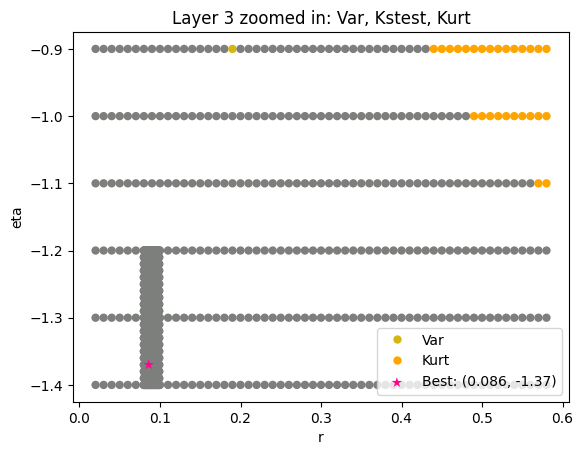

Layer 4


100%|██████████| 420/420 [00:07<00:00, 57.90it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 4 best parameters: ((0.171, -0.92), 0.07706999999999992)


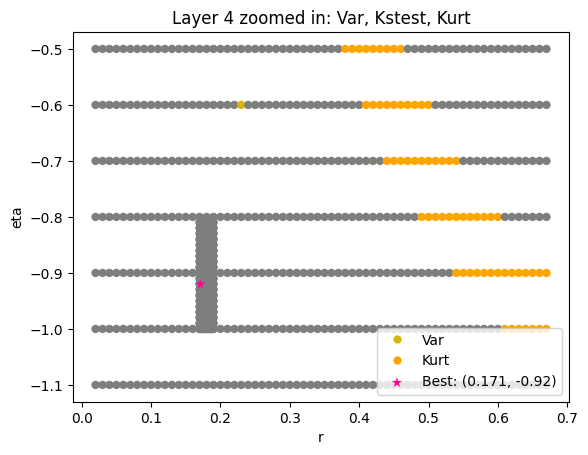

Layer 5


100%|██████████| 441/441 [00:08<00:00, 54.41it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 5 best parameters: ((0.162, -1.14), 0.04215403985692584)


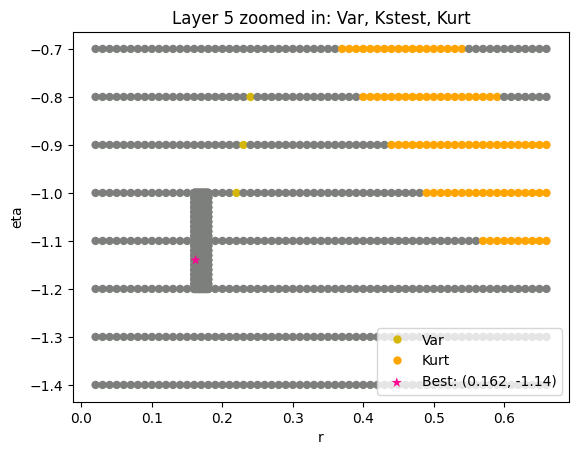

Layer 6


100%|██████████| 441/441 [00:07<00:00, 59.23it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 6 best parameters: ((0.228, -0.97), 0.021304151515127434)


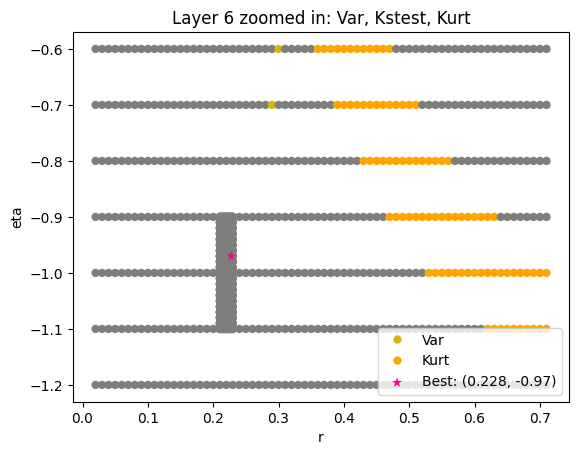

Layer 7


100%|██████████| 441/441 [00:08<00:00, 52.41it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 7 best parameters: ((0.27, -1.03), 0.013764357510432312)


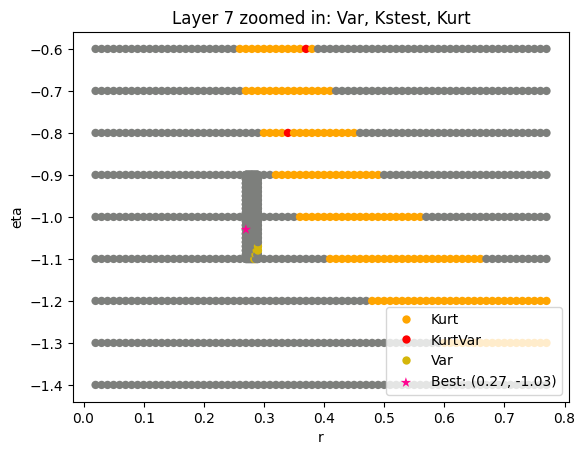

Layer 8
(0.422, -1.03), 50 of 462
(0.424, -0.95), 100 of 462
(0.427, -1.08), 150 of 462
(0.429, -1.0), 200 of 462
(0.431, -0.92), 250 of 462
(0.434, -1.05), 300 of 462
(0.436, -0.97), 350 of 462
(0.439, -1.1), 400 of 462


100%|██████████| 441/441 [00:22<00:00, 19.39it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 8 best parameters: ((0.42, -1.01), 0.01165614370284479)


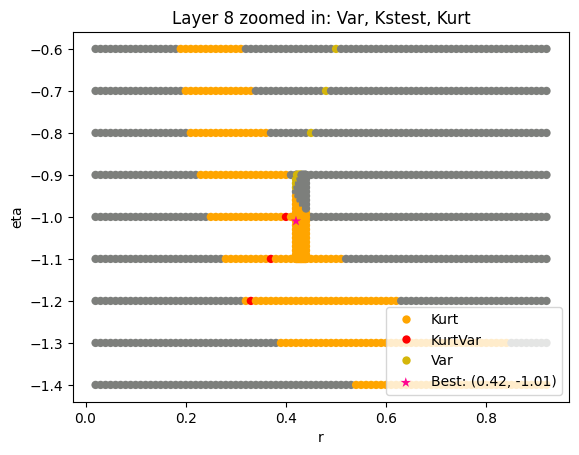

Layer 9
(1.222, -1.03), 50 of 441
(1.224, -0.95), 100 of 441
(1.227, -1.08), 150 of 441
(1.229, -1.0), 200 of 441
(1.231, -0.92), 250 of 441
(1.234, -1.05), 300 of 441
(1.236, -0.97), 350 of 441
(1.239, -1.1), 400 of 441


100%|██████████| 441/441 [00:07<00:00, 58.26it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 layer 9 best parameters: ((1.229, -1.0), 0.0165857006105411)


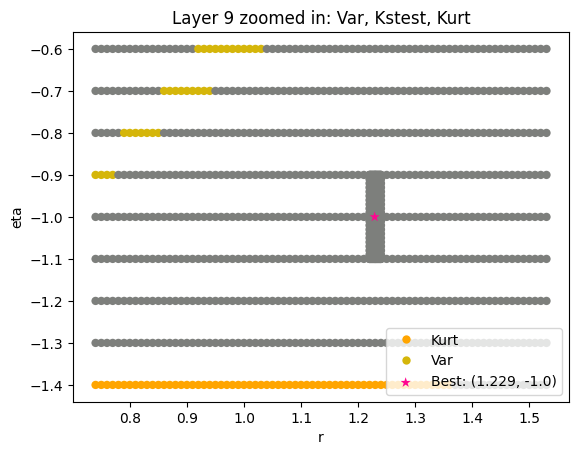

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0,best_r,best_eta,kstest_stat_best,iter1_r,iter1_eta,kstest_stat_iter1,n_pval_0.05
layer,,,,,,,,,,,,,,,,,,,,
2,18678.610095,17966.073886,19422.080909,4.316037,3.317390,5.573077,27208.0,0.21,0.0,0.020902,0.008227,0.020902,0.21,0.205,-0.10,0.019506,0.205,-0.10,0.019506,5101
3,5005.063650,4855.965346,5158.679696,11.797886,9.044237,15.566047,108832.0,0.09,-1.3,0.132440,0.004115,0.132444,0.29,0.086,-1.37,0.132440,0.086,-1.37,0.132440,106
4,1581.178010,1537.627181,1624.394654,9.157593,7.794711,11.019769,333298.0,0.18,-0.9,0.077070,0.002352,0.086826,0.30,0.171,-0.92,0.077070,0.171,-0.92,0.077070,306
5,447.847215,435.501122,461.318748,10.530340,7.889795,15.658804,1149538.0,0.17,-1.1,0.042157,0.001267,0.073939,0.34,0.162,-1.14,0.042154,0.162,-1.14,0.042154,1062
6,107.281974,104.317266,110.387641,10.589933,8.557735,13.717805,4251250.0,0.22,-1.0,0.023660,0.000659,0.058179,0.41,0.228,-0.97,0.021304,0.228,-0.97,0.021304,4151
7,23.563500,22.718360,24.468354,18.387578,12.287278,29.259174,17005000.0,0.28,-1.0,0.018575,0.000329,0.064562,0.60,0.270,-1.03,0.013764,0.270,-1.03,0.013764,9340
8,5.003841,4.767093,5.268274,36.420392,18.094400,73.733458,68020000.0,0.43,-1.0,0.012470,0.000165,0.065002,1.57,0.420,-1.01,0.011656,0.420,-1.01,0.011656,14010
9,0.925920,0.862232,1.016825,103.432572,23.139160,238.260365,272080000.0,1.23,-1.0,0.016603,0.000082,0.121877,6.10,1.229,-1.00,0.016586,1.229,-1.00,0.016586,7003


In [15]:
SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [1, 1, 1, 1, 1, 1, 1, 1]))
NUM_SAMPLES_OPTIMIZE = 2000

if SKIP_OPTIMIZE_STEP:
    master_df['kstest_stat'] = master_df['kstest_stat_initial']
    master_df[f'best_r'] = master_df['initial_r']
    master_df[f'best_eta'] = master_df['initial_eta']
else:
    for group in GROUPS: 
        print(f"{GROUP.capitalize()} {group}")
        sample = group_data_map[group]
        initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
        r_granularity = 10
        eta_granularity = 10
        for i in range(-1, -5, -1):
            if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                r_granularity = 10.**i
            if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                
                eta_granularity = 10.**i

        for d in range(1, NUM_ITERS[group] + 1):
            if d == 1:
                initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            else:
                initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
            r_granularity = r_granularity * 10.0**(-d+1) 
            eta_granularity = eta_granularity * 10.0**(-d+1) 

            r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
            eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
            simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
            cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
            ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

            temp_df = create_kurt_var_ksstat_df(cdfs_dict)
            temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
            group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
            master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
            master_df.loc[group, 'kstest_stat_best'] = kstest_stat
            master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
            master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
            
            print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

        temp_df = group_cdf_df_dict[group]
        eps = 0.5
        filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                        (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                        (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                        (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']
        fig = combo_test_plot(filtered_df, cols, 
                              plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                              best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
        fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
        
master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'), index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

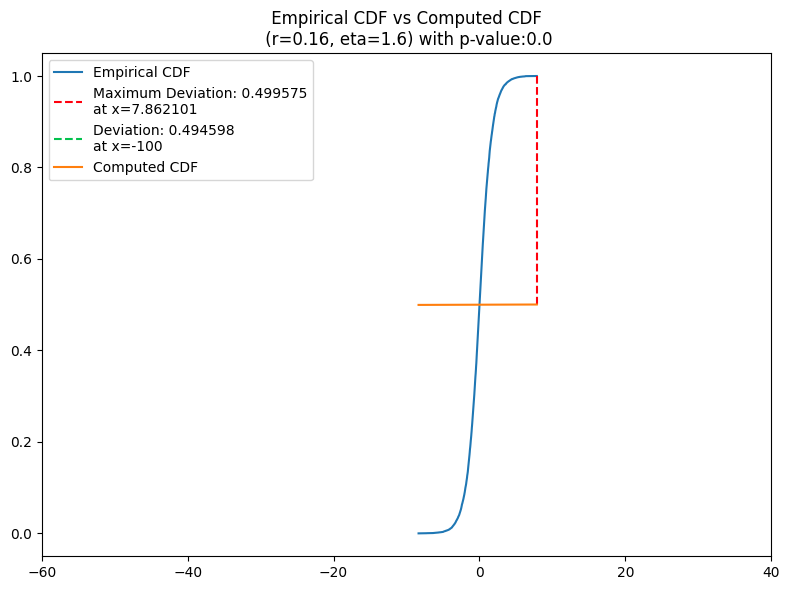

In [16]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

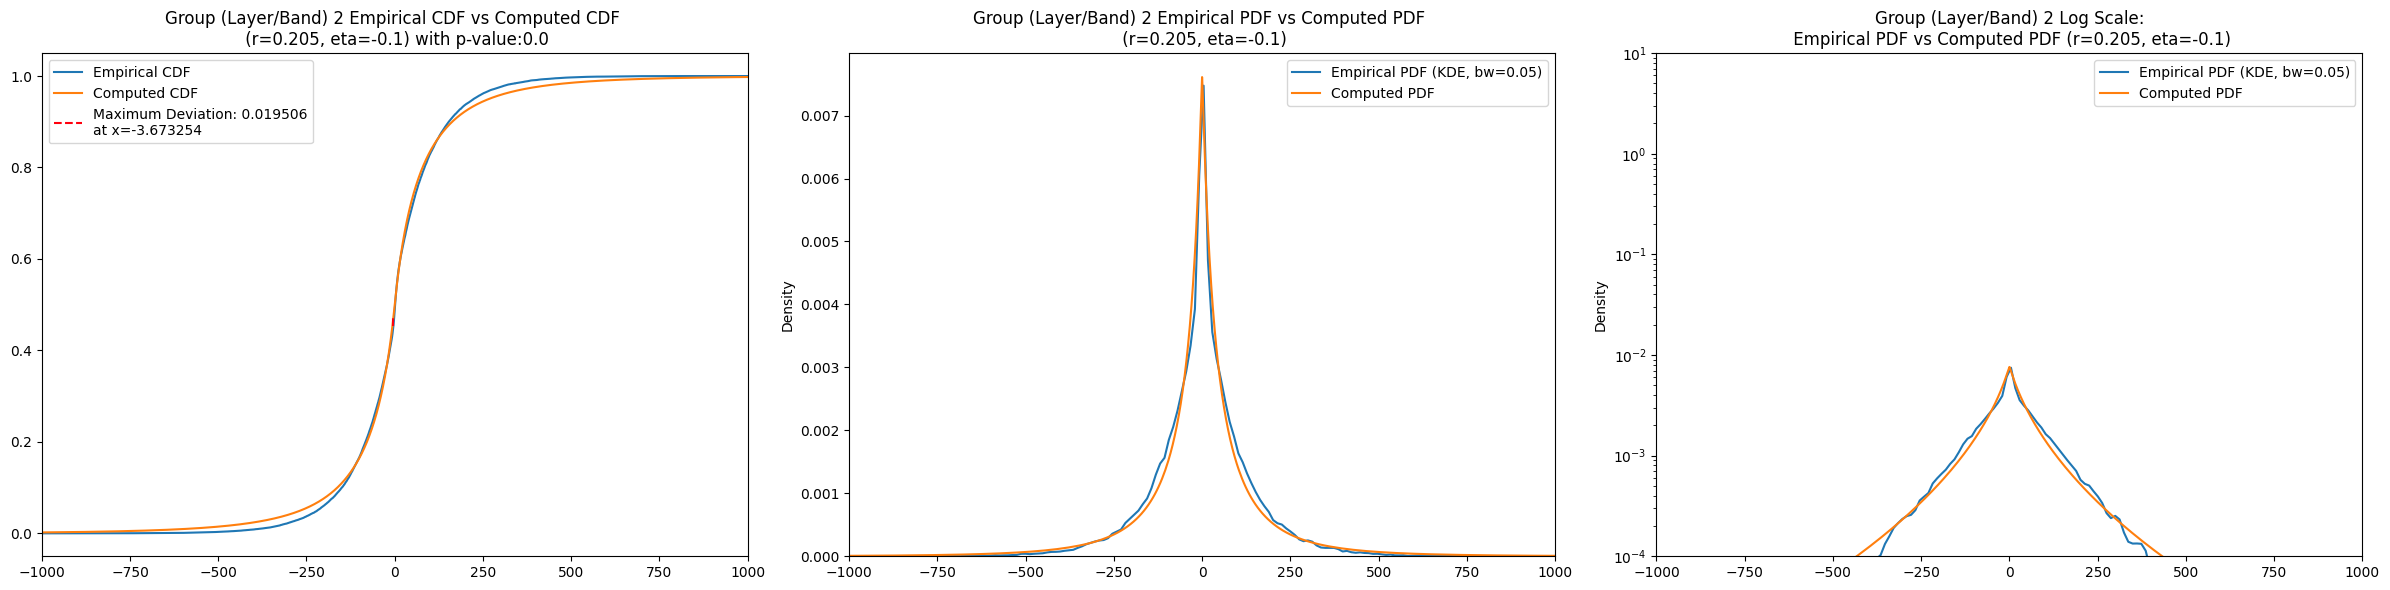

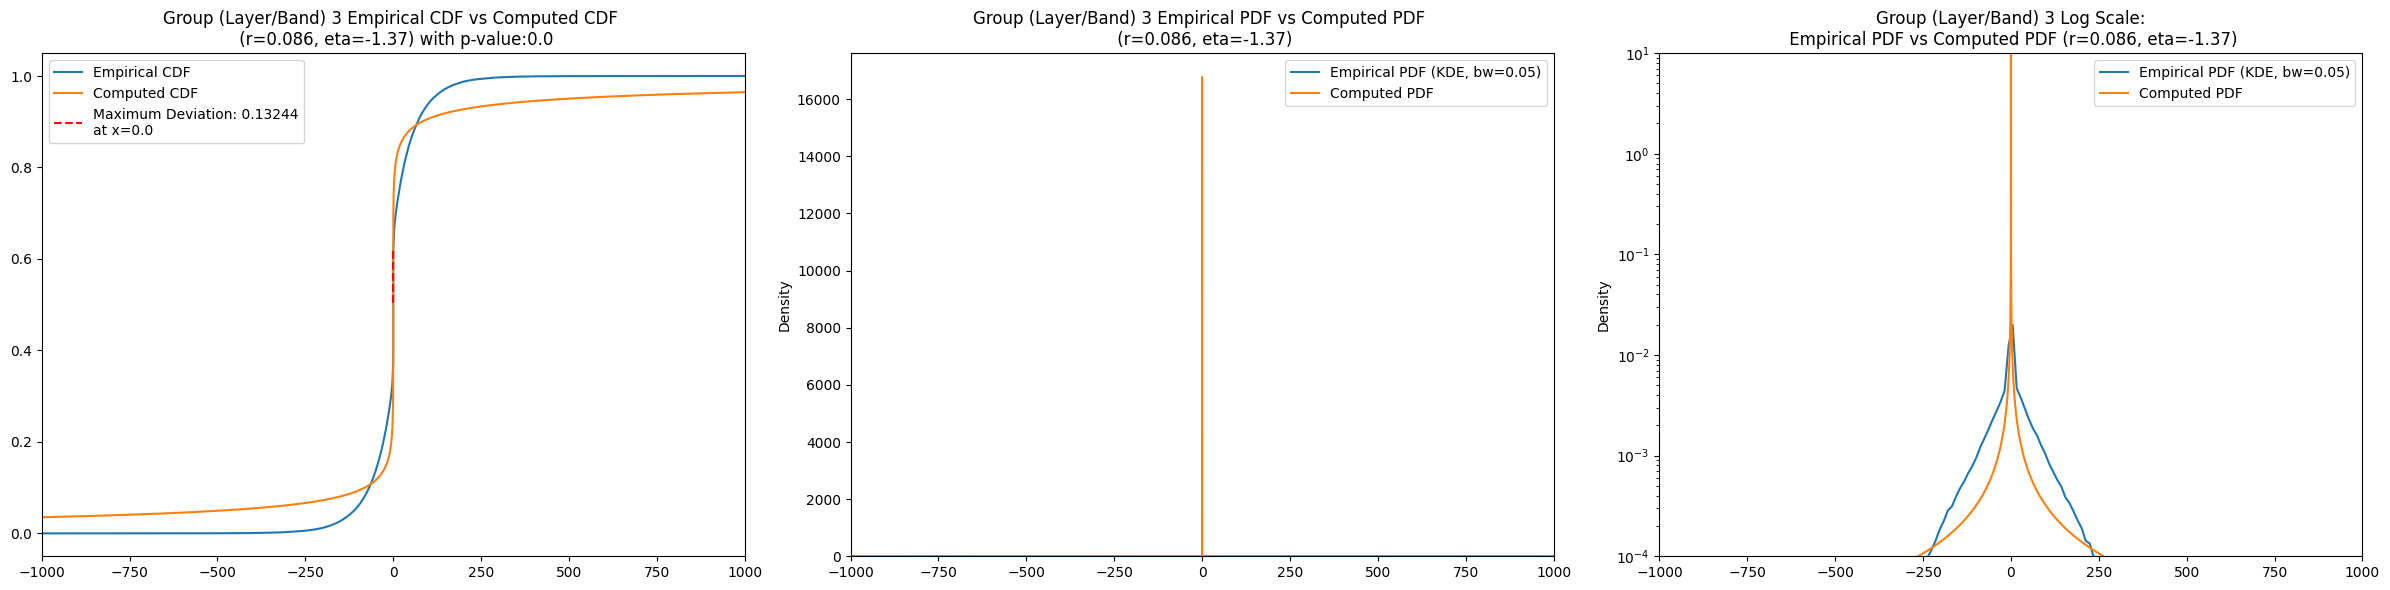

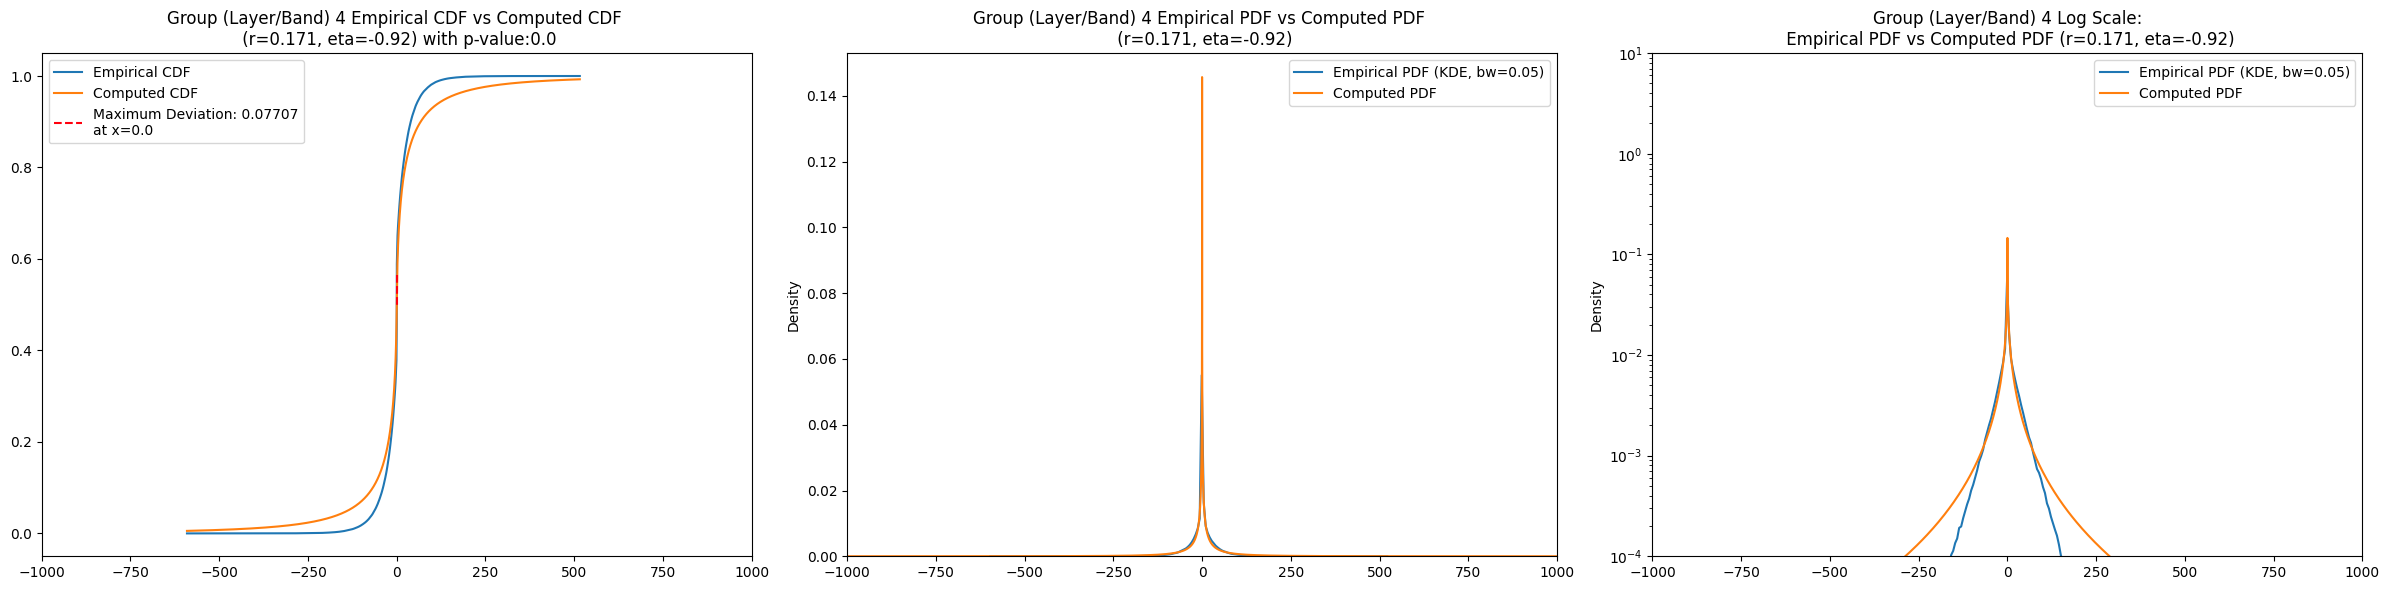

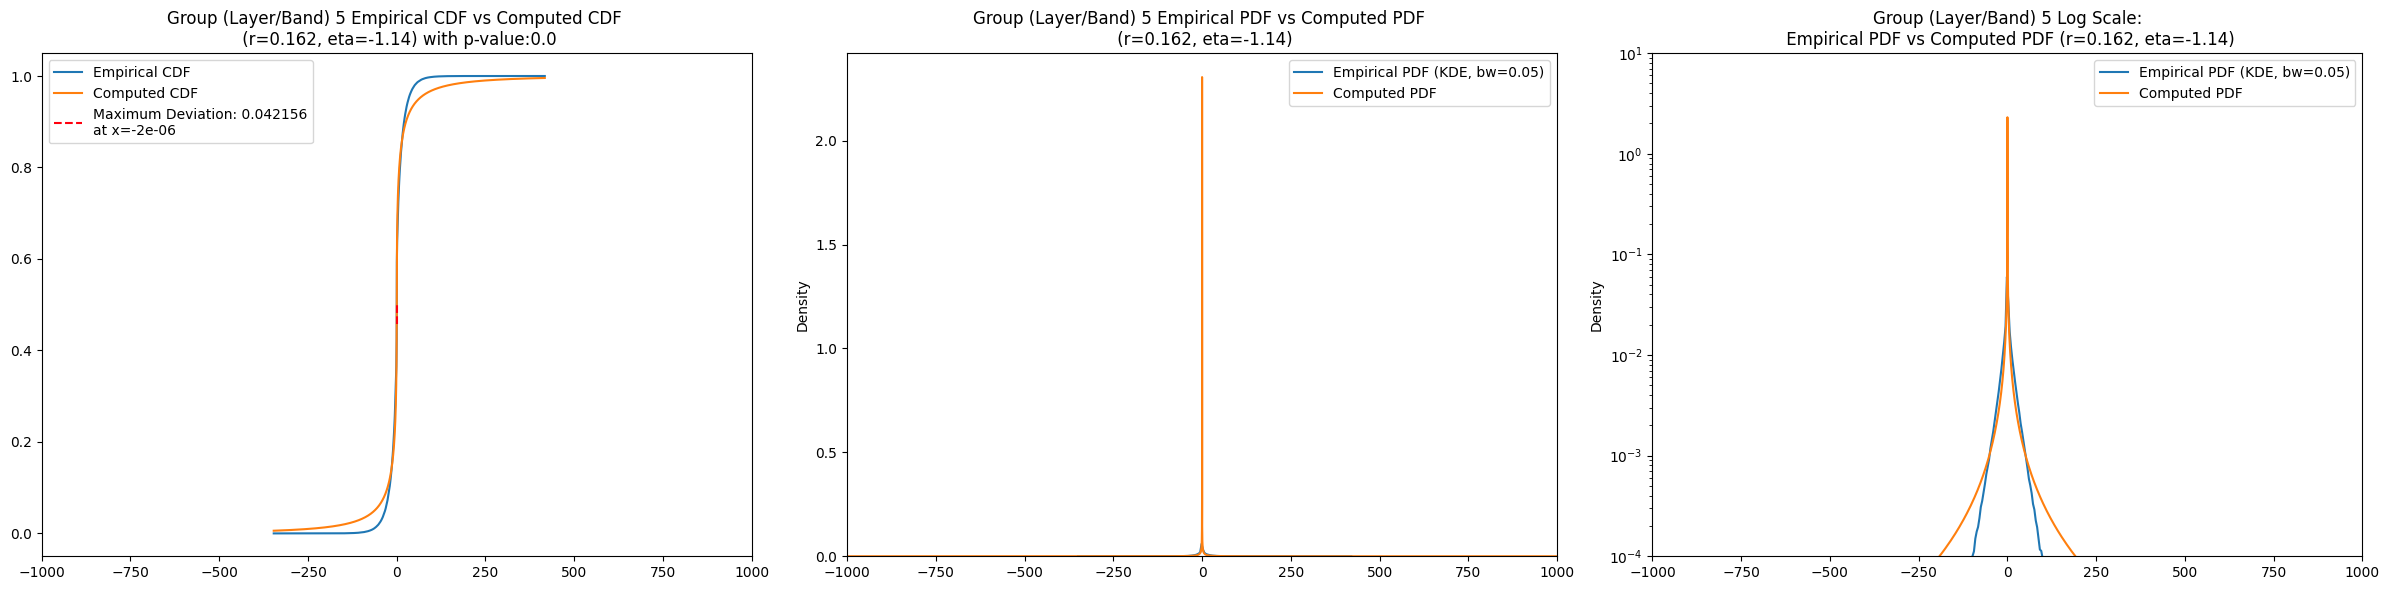

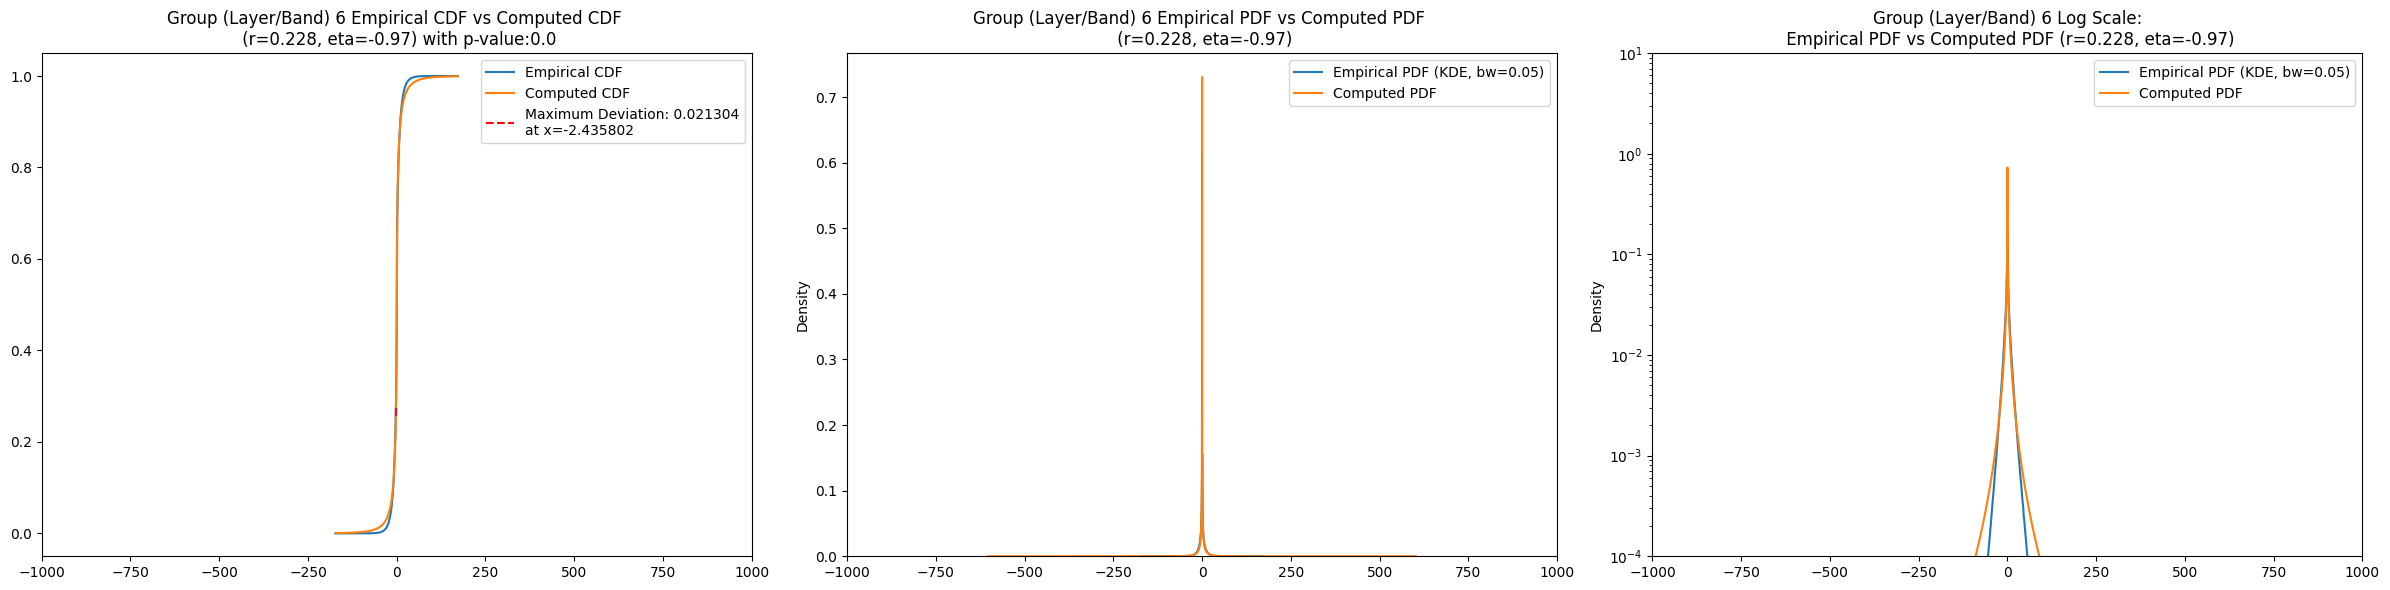

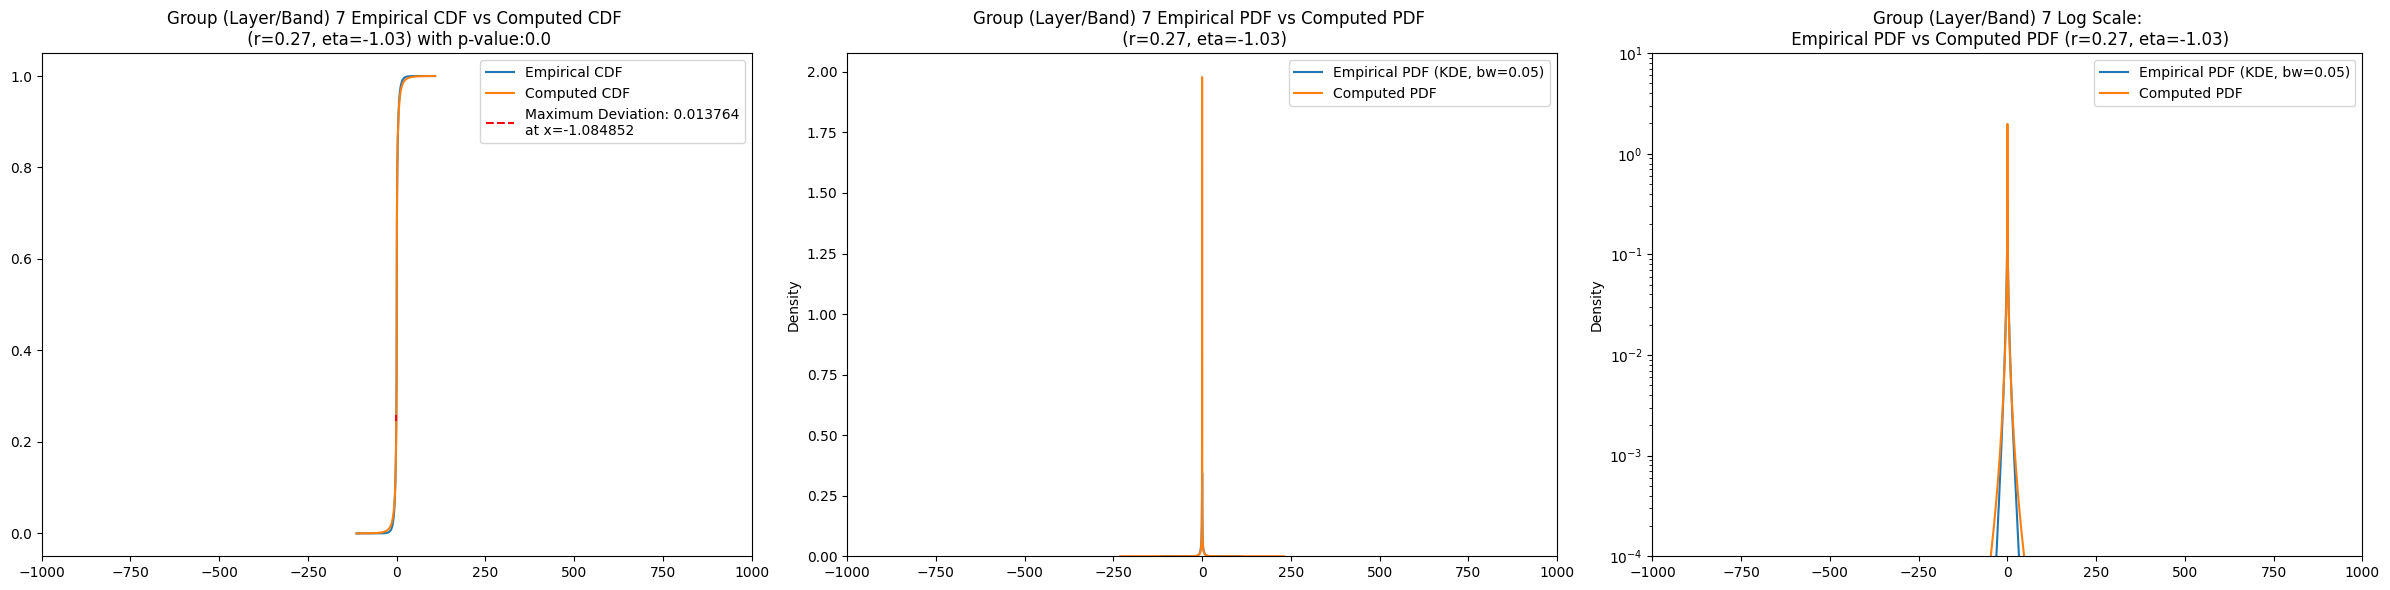

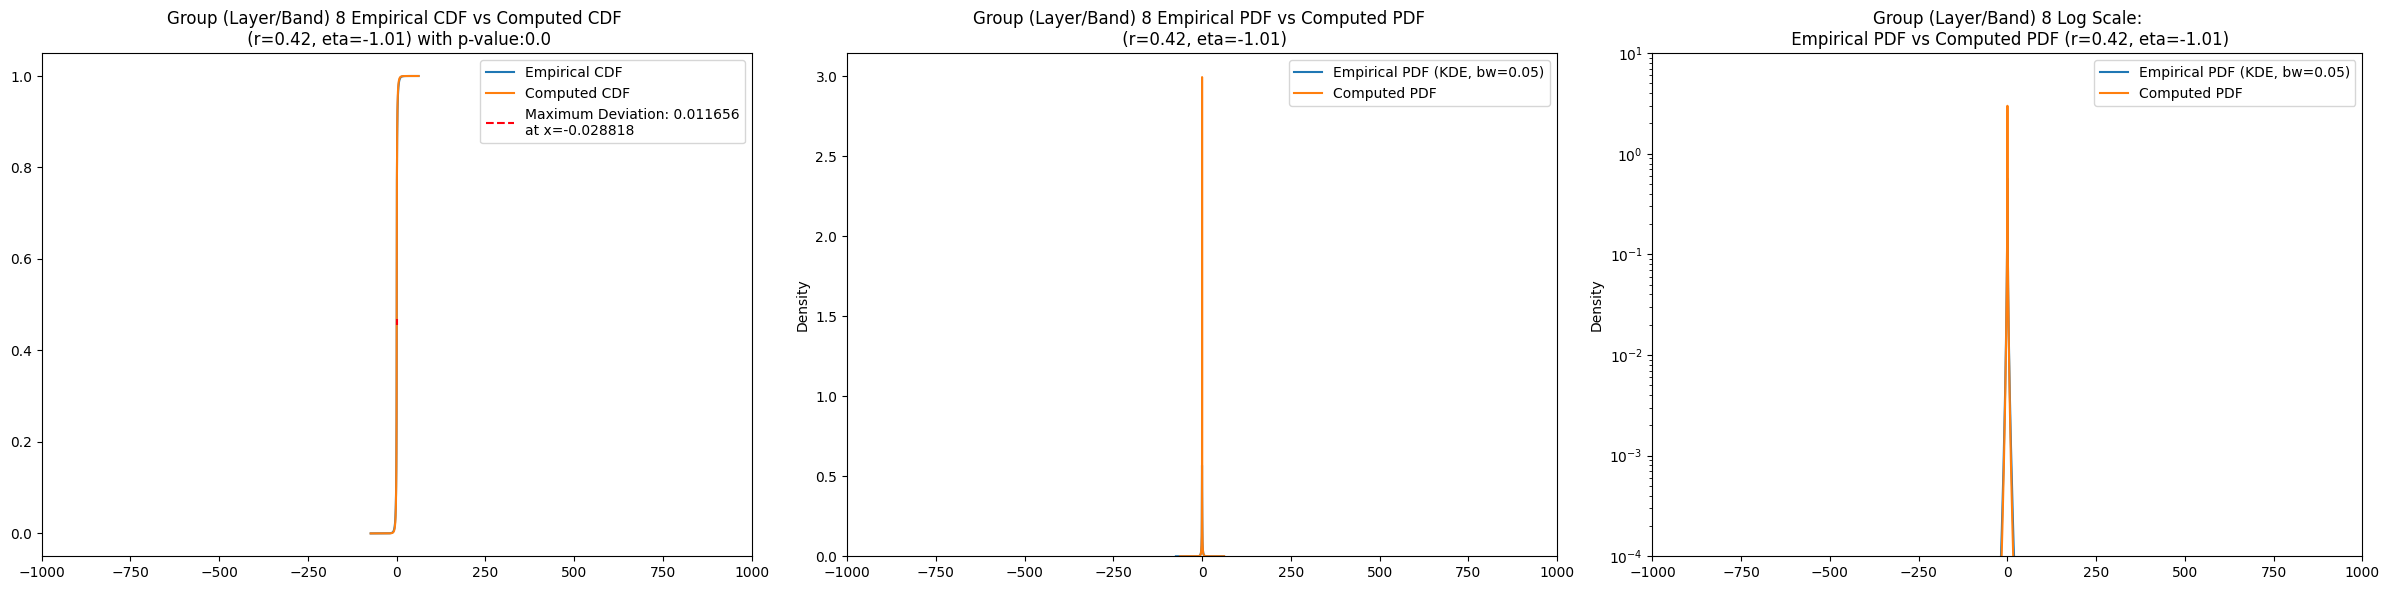

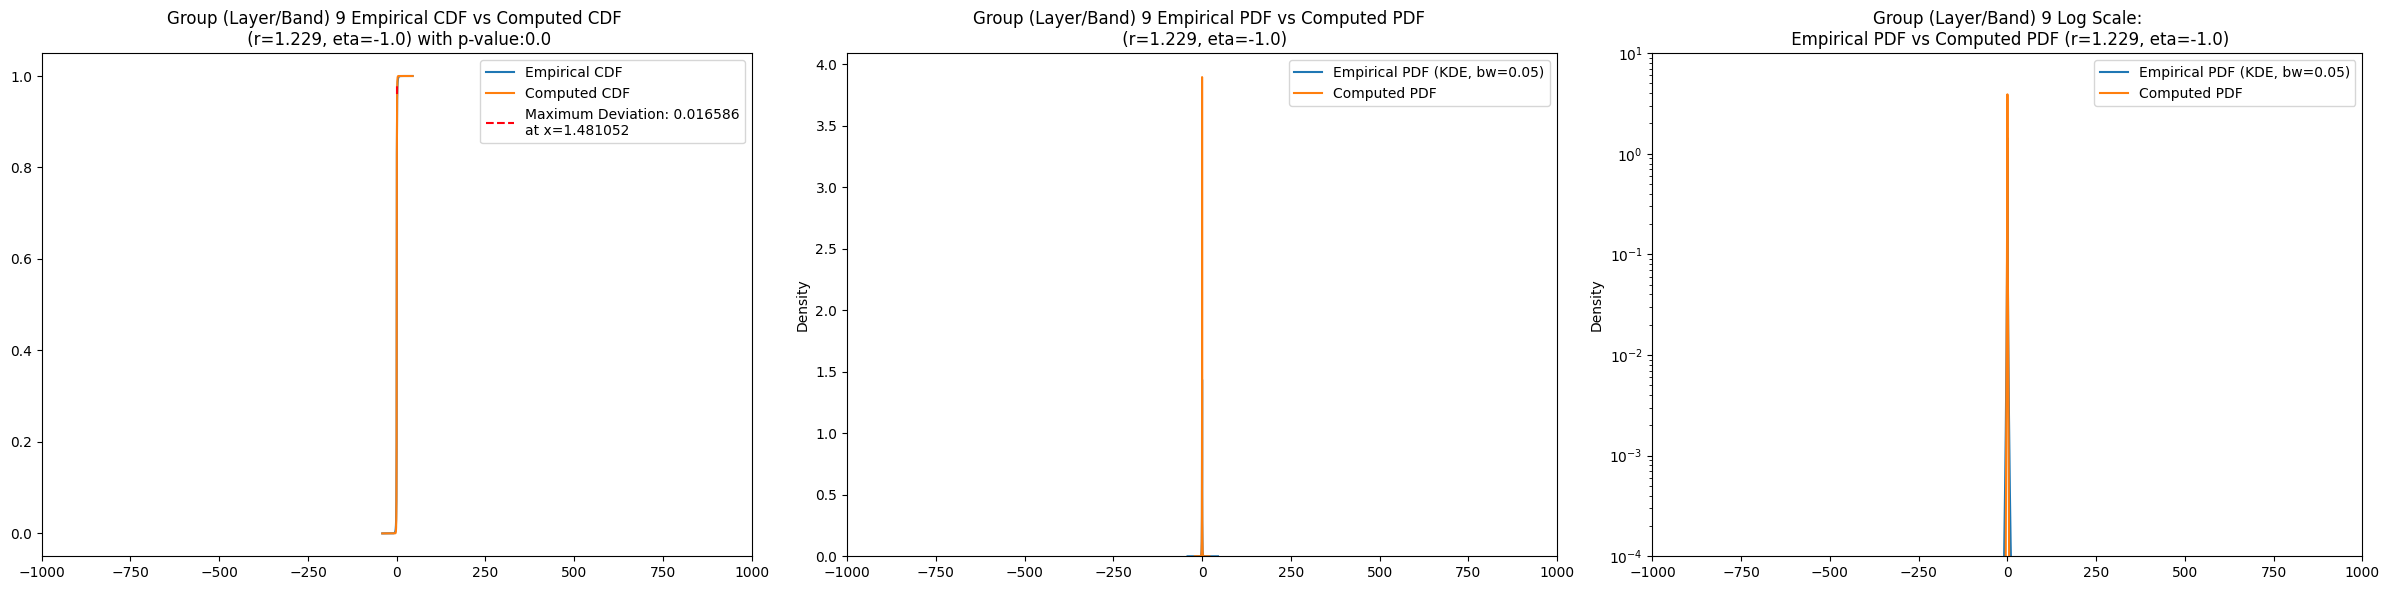

In [16]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))#,
                    #provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [17]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [18]:
for group in GROUPS:
    upper_bound = int(1e5)
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,18678.610095,17966.073886,19422.080909,4.316037,3.317390,5.573077,27208.0,0.21,0.0,0.020902,...,97.783800,0.044233,1.073510e-46,81.396700,0.026321,8.300720e-17,68.279900,0.031579,5.240460e-24,2.010600e-09
3,5005.063650,4855.965346,5158.679696,11.797886,9.044237,15.566047,108832.0,0.09,-1.3,0.132440,...,21.694100,0.133661,0.000000e+00,14.961000,0.132445,0.000000e+00,12.082400,0.132451,0.000000e+00,0.000000e+00
4,1581.178010,1537.627181,1624.394654,9.157593,7.794711,11.019769,333298.0,0.18,-0.9,0.077070,...,16.048900,0.103689,0.000000e+00,12.441900,0.090926,0.000000e+00,10.038900,0.093887,0.000000e+00,0.000000e+00
5,447.847215,435.501122,461.318748,10.530340,7.889795,15.658804,1149538.0,0.17,-1.1,0.042157,...,9.329520,0.089743,0.000000e+00,7.243720,0.076202,0.000000e+00,5.830180,0.079129,0.000000e+00,0.000000e+00
6,107.281974,104.317266,110.387641,10.589933,8.557735,13.717805,4251250.0,0.22,-1.0,0.023660,...,4.952390,0.076947,0.000000e+00,3.968450,0.059209,0.000000e+00,3.208150,0.062936,0.000000e+00,0.000000e+00
7,23.563500,22.718360,24.468354,18.387578,12.287278,29.259174,17005000.0,0.28,-1.0,0.018575,...,2.014320,0.082259,0.000000e+00,1.660870,0.060900,0.000000e+00,1.319320,0.064368,0.000000e+00,0.000000e+00
8,5.003841,4.767093,5.268274,36.420392,18.094400,73.733458,68020000.0,0.43,-1.0,0.012470,...,0.853965,0.078585,0.000000e+00,0.739293,0.052345,0.000000e+00,0.580553,0.053484,0.000000e+00,0.000000e+00
9,0.925920,0.862232,1.016825,103.432572,23.139160,238.260365,272080000.0,1.23,-1.0,0.016603,...,0.433595,0.058977,0.000000e+00,0.381958,0.031825,0.000000e+00,0.304260,0.030163,0.000000e+00,0.000000e+00


# Examining Tail Behavior

In [20]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:577: RuntimeWarning: divide by zero encountered in divide
  tail_ratios =

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,,,,,,,,,,,,
2,803.473892,751.378924,857.028528,0.094996,-0.097312,0.299754,3180.0,0.42,5.7,0.018069,...,"(0.1239, 1.0126)","(0.1239, 1.0126)","(0.9368, 1.9545)","(0.9368, 1.9545)","(0.95089, 7.3557)","(0.95089, 7.3557)","(0.015521, 1.04)","(0.015521, 1.04)",0.018069,0.018069
3,275.270192,264.590167,286.288690,0.374403,0.219221,0.546058,12720.0,0.51,7.3,0.004615,...,"(0.25381, 1.016)","(0.25381, 1.016)","(0.96671, 76.943)","(0.96671, 76.943)","(0.96151, 2839.9)","(0.96151, 2839.9)","(0.0074015, 1.1147)","(0.0074015, 1.1147)",0.004615,0.003824
4,80.847728,77.046186,84.706154,1.357251,1.030759,1.855357,50880.0,0.44,1.4,0.006270,...,"(0.098794, 1.0029)","(0.098794, 1.0029)","(0.93633, 391120.0)","(0.97872, 391120.0)","(0.95756, 119260000.0)","(0.95756, 119260000.0)","(0.003275, 1.0744)","(0.003275, 1.0176)",0.005812,0.005487
5,19.882305,18.762781,21.056150,3.074957,2.230657,5.079245,203520.0,0.47,0.2,0.005236,...,"(0.28817, 3.9814)","(0.28817, 3.9814)","(0.90723, 1.8721999999999998e+35)","(0.98075, 1.8721999999999998e+35)","(0.95007, 1.8763e+47)","(0.97884, 1.8763e+47)","(0.006972, 1.0662)","(0.006972, 1.0104)",0.003322,0.001374
6,4.187365,3.884993,4.587161,7.592764,3.861297,29.028659,814080.0,0.51,-0.6,0.004349,...,"(0.37732, 1.0407)","(0.37732, 1.0407)","(0.87959, 3.0205e+57)","(0.99905, 3.0205e+57)","(0.9364, 2.0407000000000003e+76)","(0.99905, 2.0407000000000003e+76)","(0.011194, 1.2183)","(0.011194, 1.0041)",0.002538,0.000984
7,0.819285,0.747353,0.916054,13.123555,6.050411,48.182214,3256320.0,0.97,-0.9,0.010413,...,"(0.95921, 15312000.0)","(0.99998, 15312000.0)","(0.8501, 6.528000000000002e+269)","(0.99998, 6.528000000000002e+269)","(0.90641, inf)","(0.99998, inf)","(0.037871, 1.5063)","(0.037871, 1.0006)",0.008446,0.000030
8,0.136744,0.117431,0.211746,172.661568,8.088640,756.942474,13025280.0,1.44,-1.2,0.051520,...,"(0.32023, 962020000000000.0)","(1.0, 962020000000000.0)","(0.83653, inf)","(1.0, inf)","(0.89532, inf)","(1.0, inf)","(0.061503, 1.7144)","(0.37126, 1.0)",0.002504,0.000010


# Results

## KS-Test Statistics

In [21]:
import pandas as pd
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

In [23]:
master_df.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,total_samples,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,kstest_stat_best,kstest_stat_iter1,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t
band,,,,,,,,,
2,47614.0,0.013900,0.006220,0.046978,0.012062,0.012062,0.483860,0.473514,0.459879
5,102030.0,0.014659,0.004250,0.054668,0.012899,0.012899,0.473428,0.461240,0.446442
8,326496.0,0.011219,0.002376,0.070794,0.010795,0.010795,0.459952,0.442455,0.424540
11,904666.0,0.008976,0.001428,0.051920,0.008976,0.008976,0.438881,0.414396,0.393588
14,2727602.0,0.010865,0.000822,0.039747,0.008708,0.008708,0.405775,0.372632,0.349735
17,8298440.0,0.008929,0.000471,0.041293,0.005652,0.005652,0.348523,0.306072,0.282141
20,25140192.0,0.003891,0.000271,0.037363,0.002292,0.002292,0.232959,0.186329,0.161970
23,65734528.0,0.002232,0.000168,0.028873,0.002109,0.002109,0.129847,0.087893,0.061921
